# Fraud Detection Project: End-to-End Summary Report

**Date:** December 30, 2025

---

## 1. Executive Summary

This project involved building a robust fraud detection system starting from raw transactional data. We performed extensive exploratory data analysis (EDA), engineered domain-specific features, and evaluated multiple machine learning models. The final selection, a **Tuned Random Forest**, achieved an **AUC-PR of 0.6470**, providing a highly effective balance between fraud detection and minimizing customer friction.

## 2. Data Analysis & EDA

We analyzed the dataset to identify patterns distinguishing fraudulent behavior from legitimate transactions.

### 2.1 Class Distribution
The dataset exhibits a classic class imbalance, with fraud being the rare event.

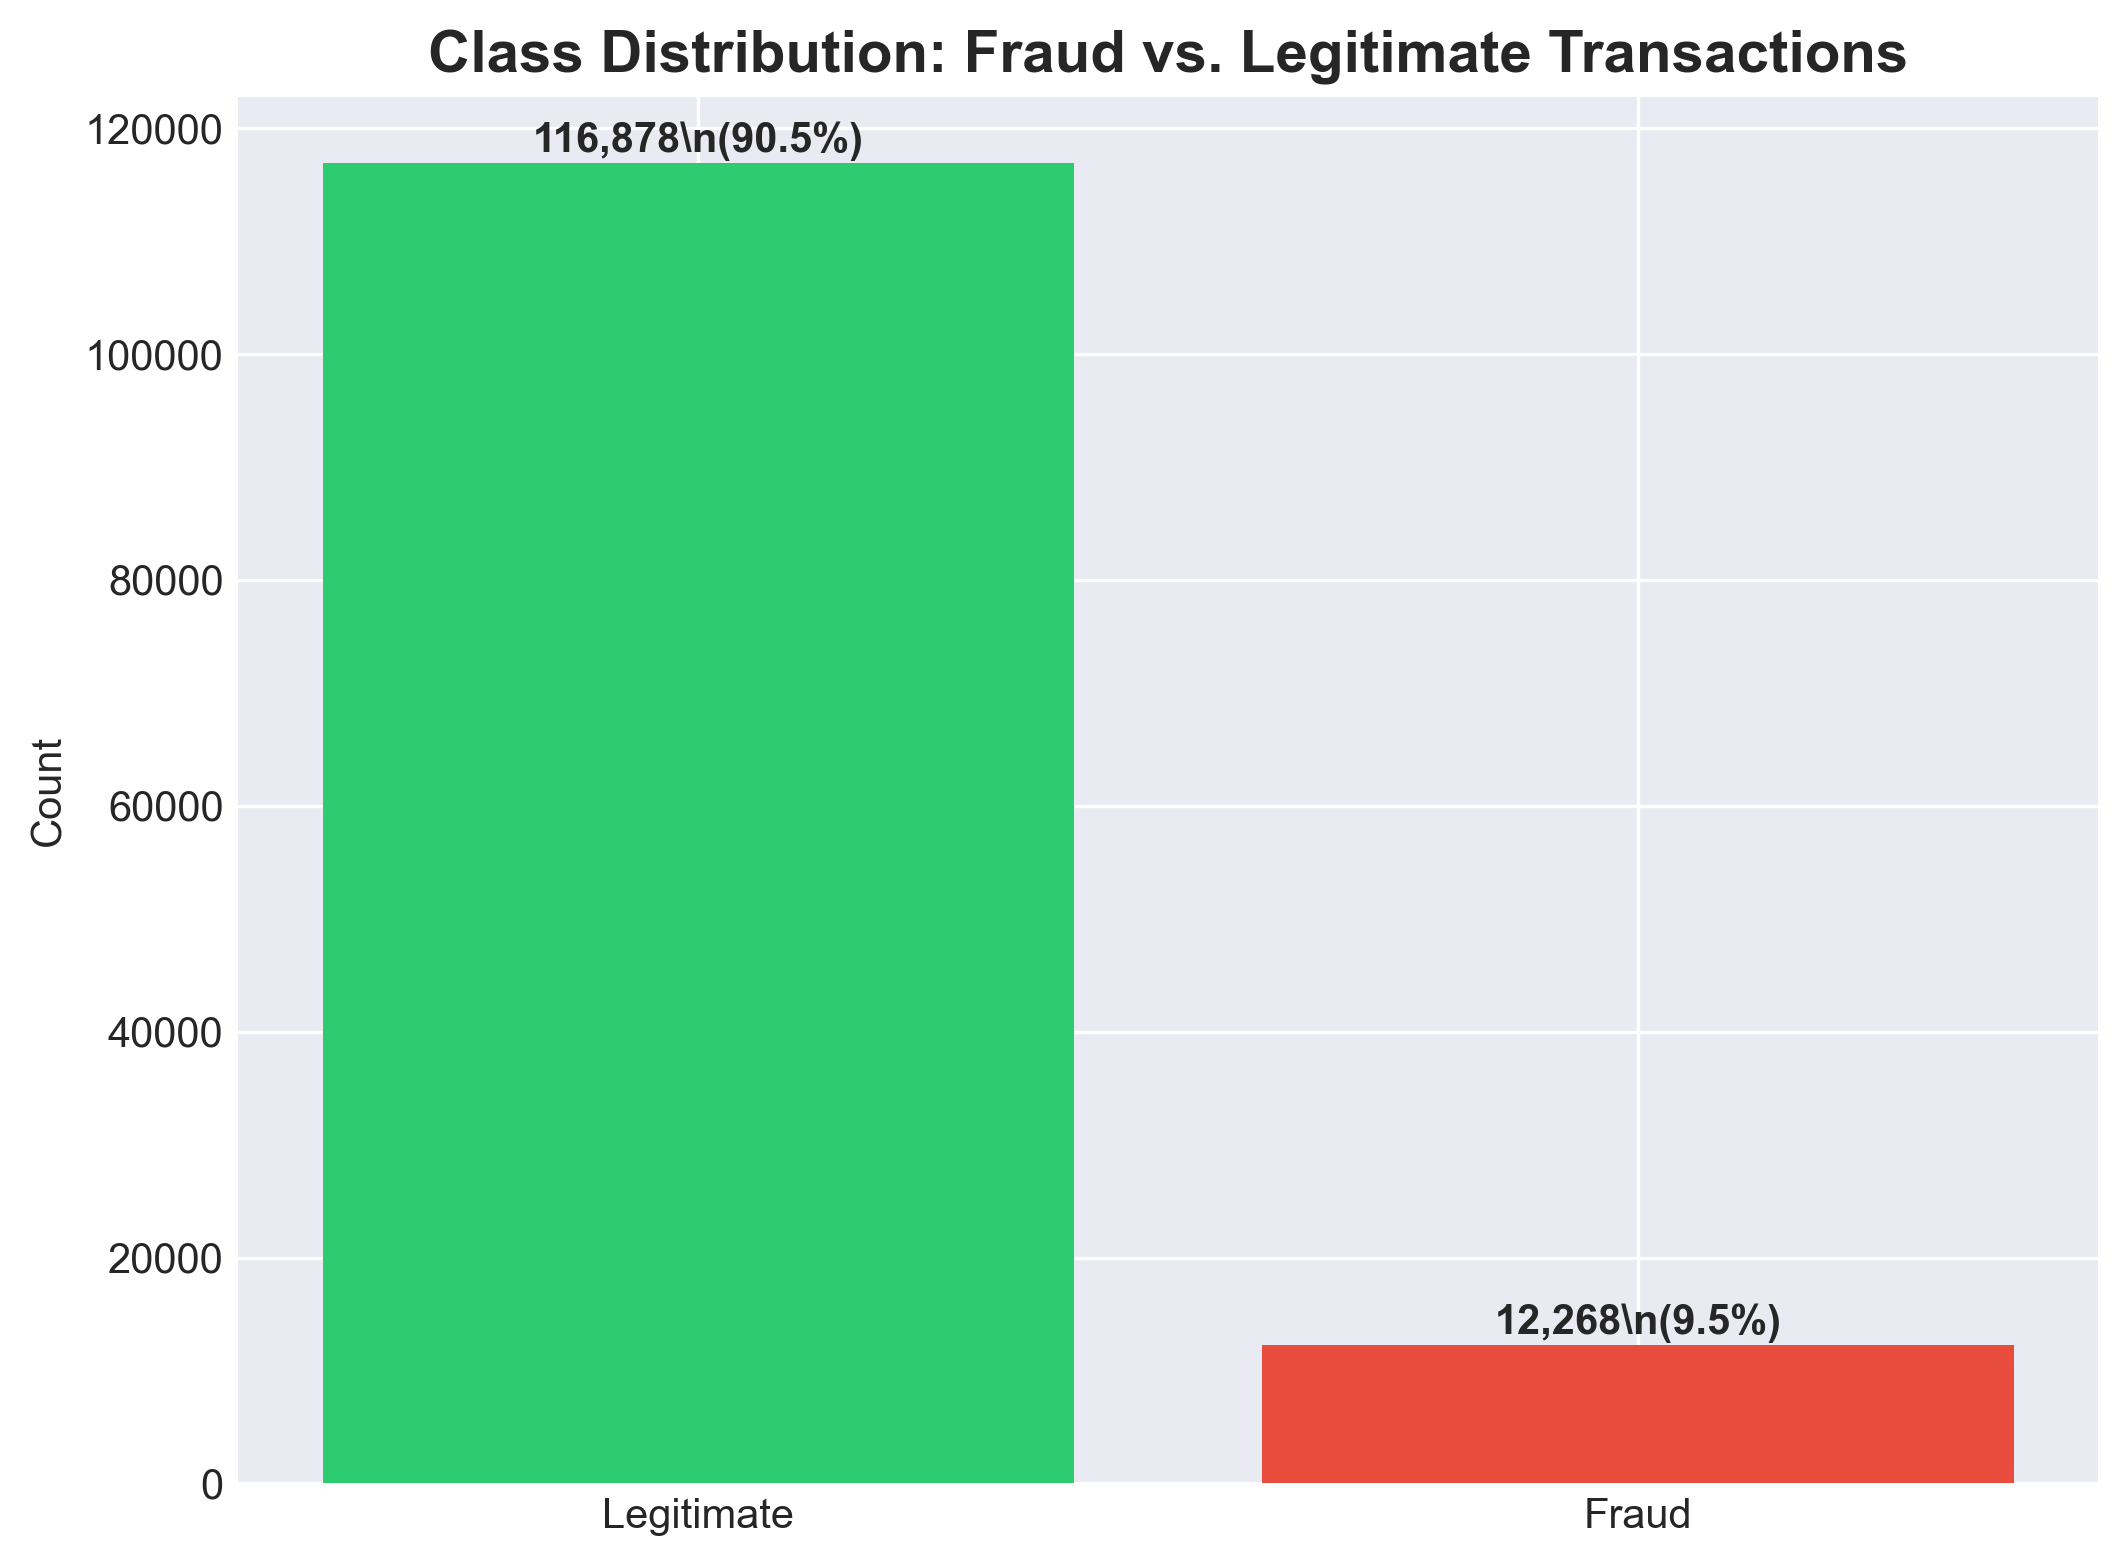

In [1]:
from IPython.display import Image, display
display(Image(filename='../report/figures/01_class_distribution.png'))

### 2.2 Behavior Insights
Fraudulent transactions are strongly correlated with a low 'Time Since Signup', suggesting automated bot-driven attacks.

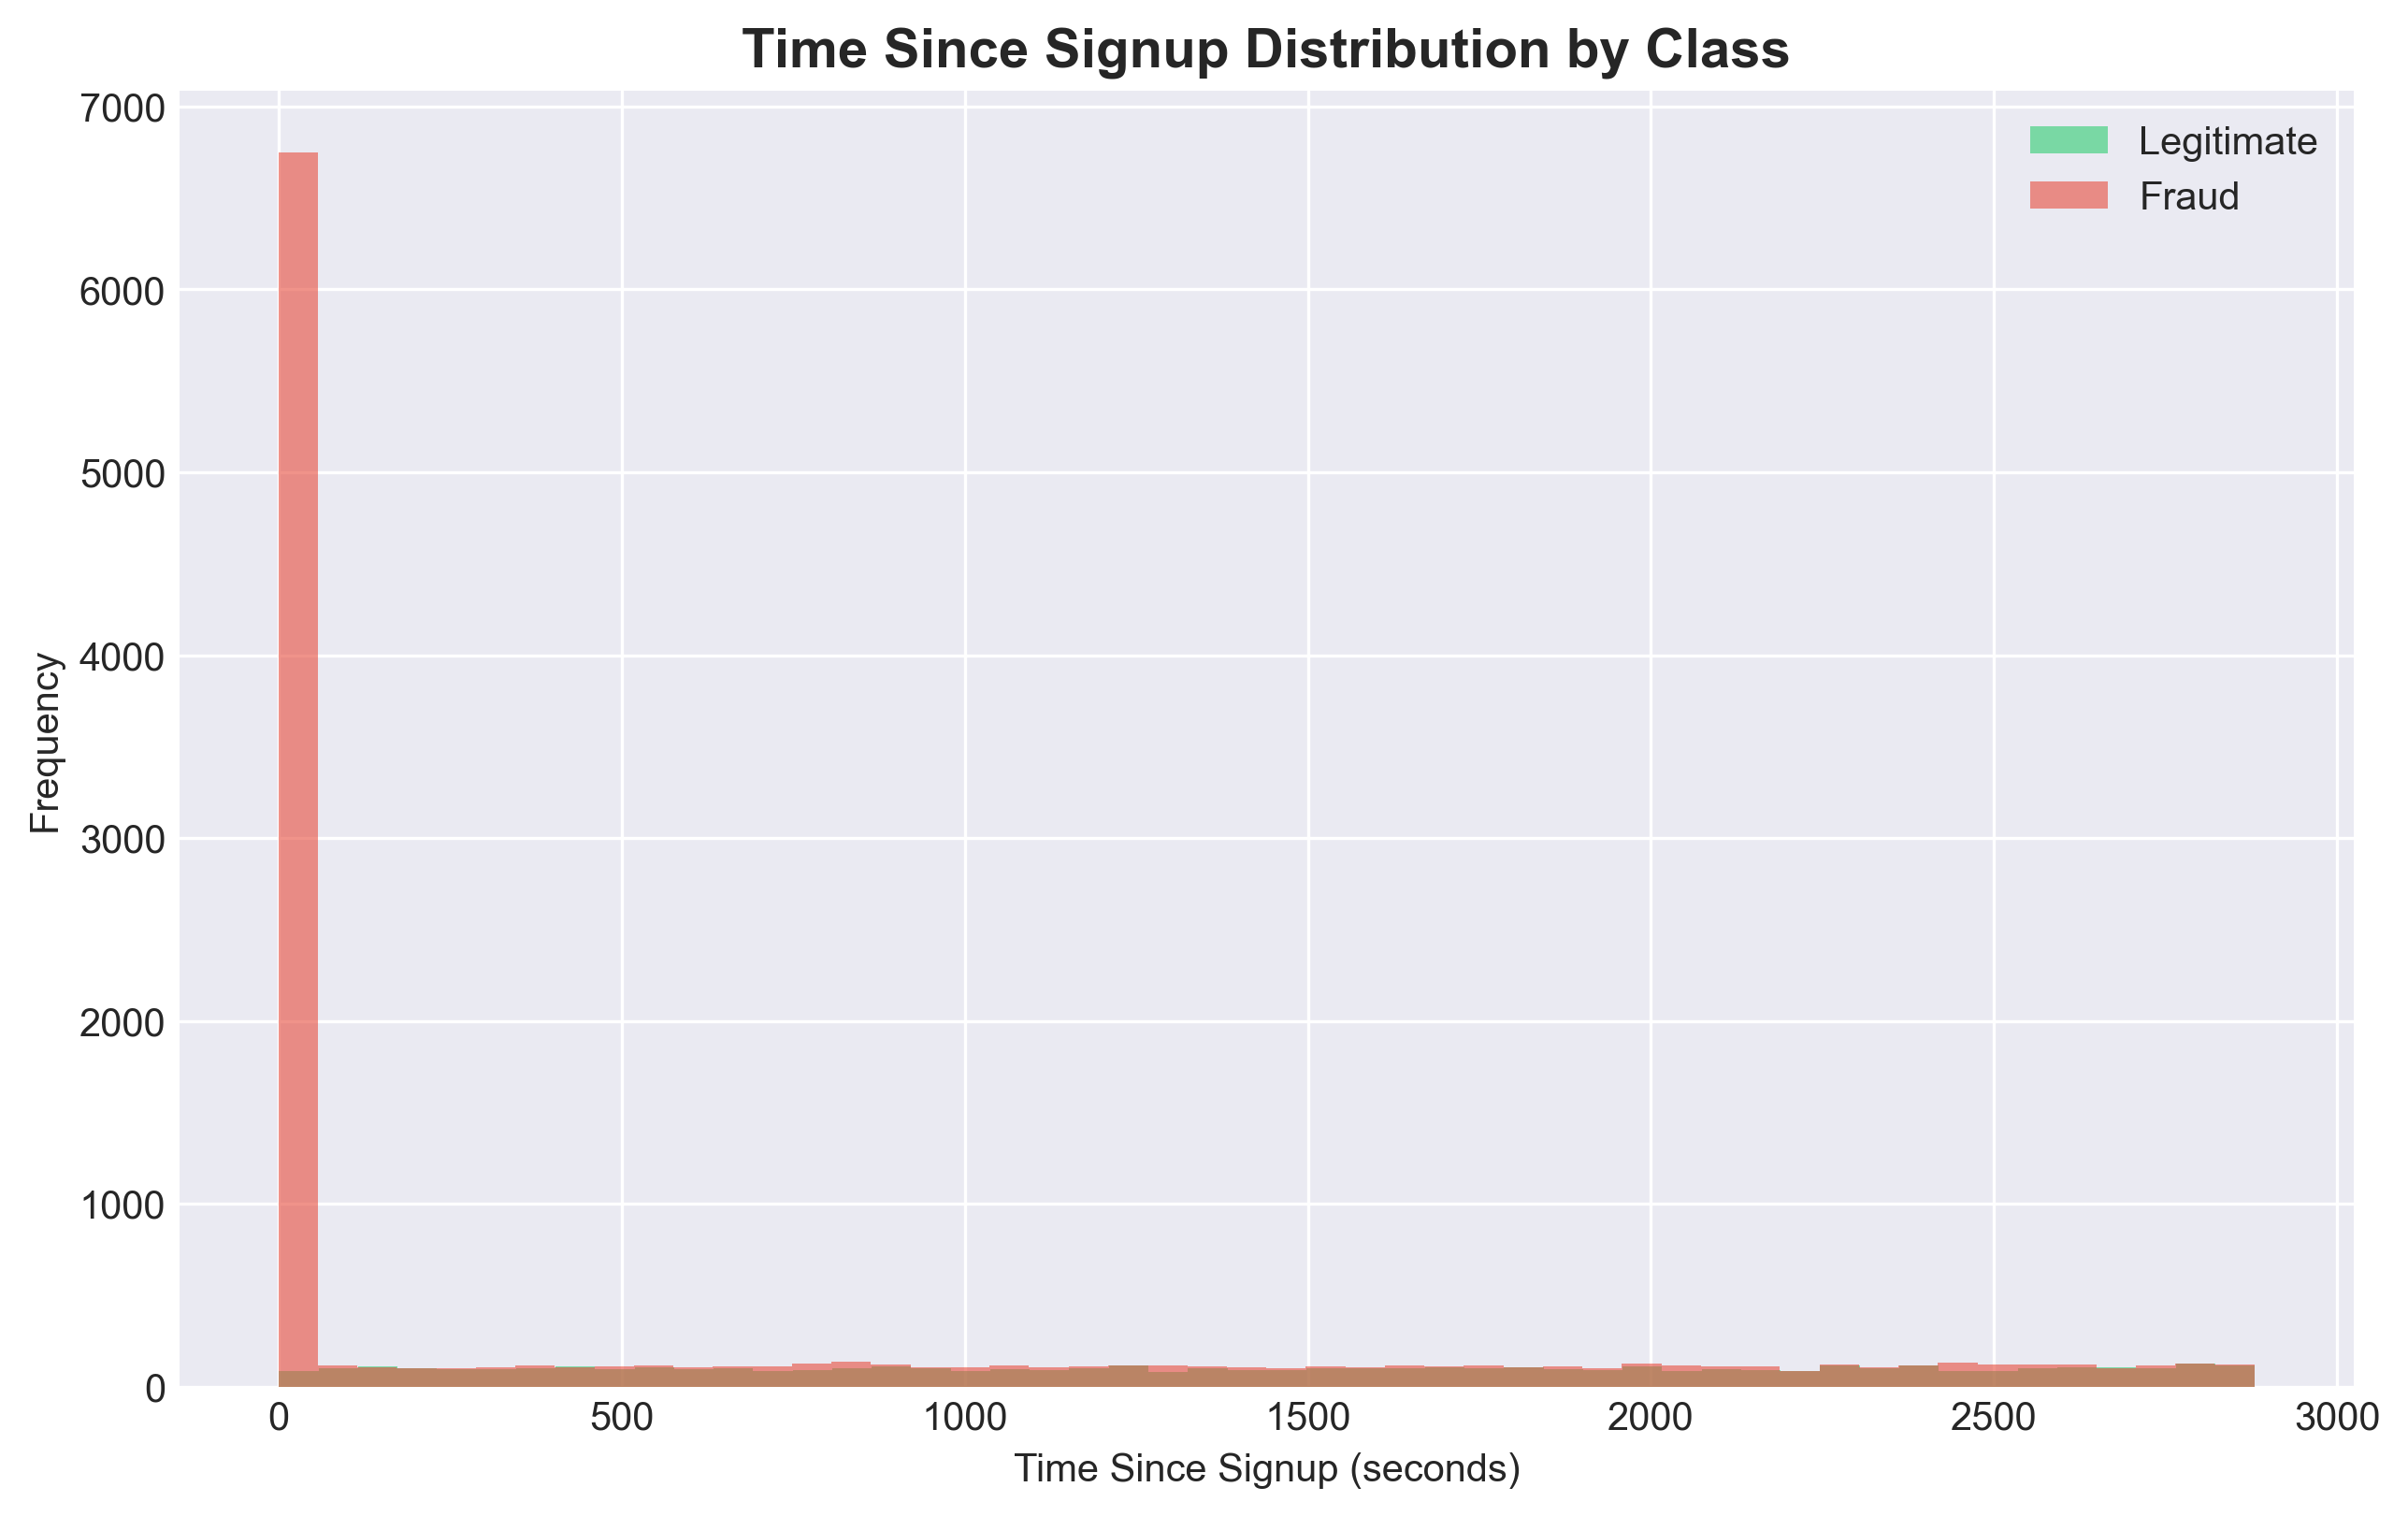

In [2]:
display(Image(filename='../report/figures/03_time_since_signup.png'))

## 3. Feature Engineering

We transformed raw data into predictive signals across four main categories:

1.  **Velocity Features:** Calculated the time difference between account creation and first transaction.
2.  **Temporal Features:** Extracted hour and day patterns to identify peak fraud times.
3.  **Geolocation:** Mapped IP addresses to countries to identify high-risk regions.
4.  **Network Features:** Identified shared devices and IP addresses to detect botnet activity.

## 4. Model Performance & Comparison

We evaluated multiple models using metrics specifically suited for imbalanced data (AUC-PR and F1-score).

### 4.1 Evaluation Metrics
Compared to the Logistic Regression baseline, ensemble models showed significant performance gains.

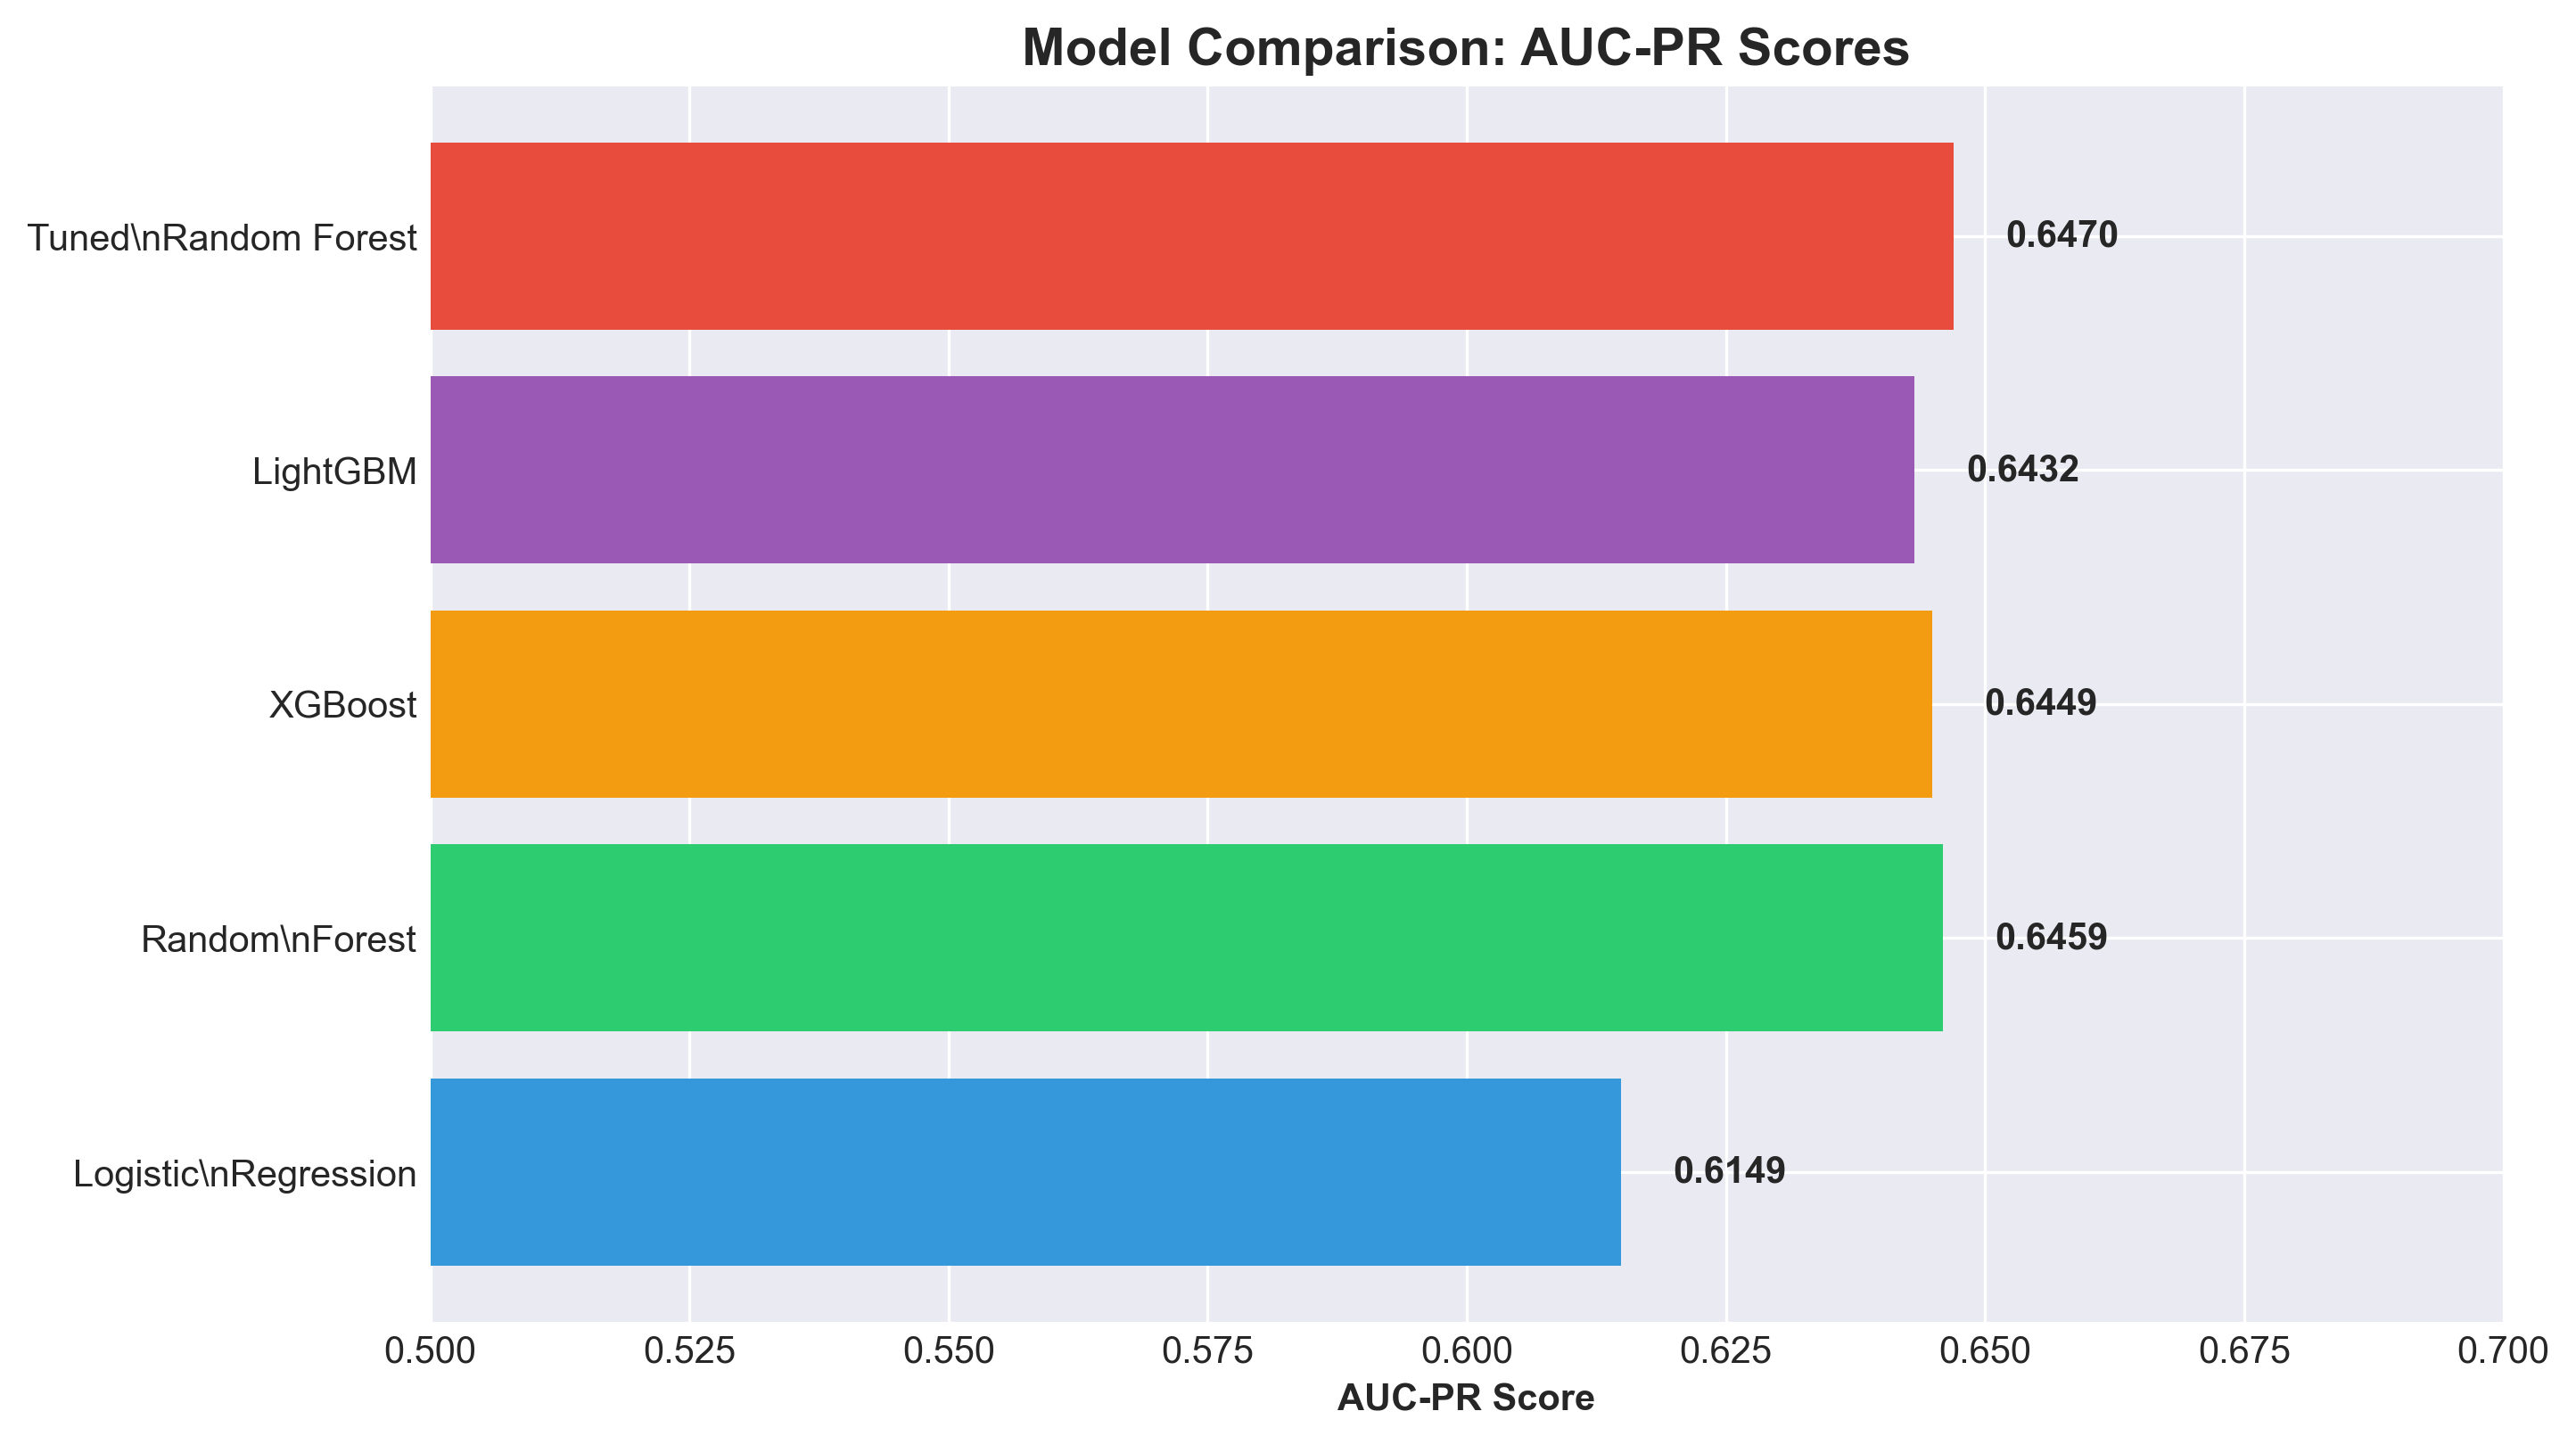

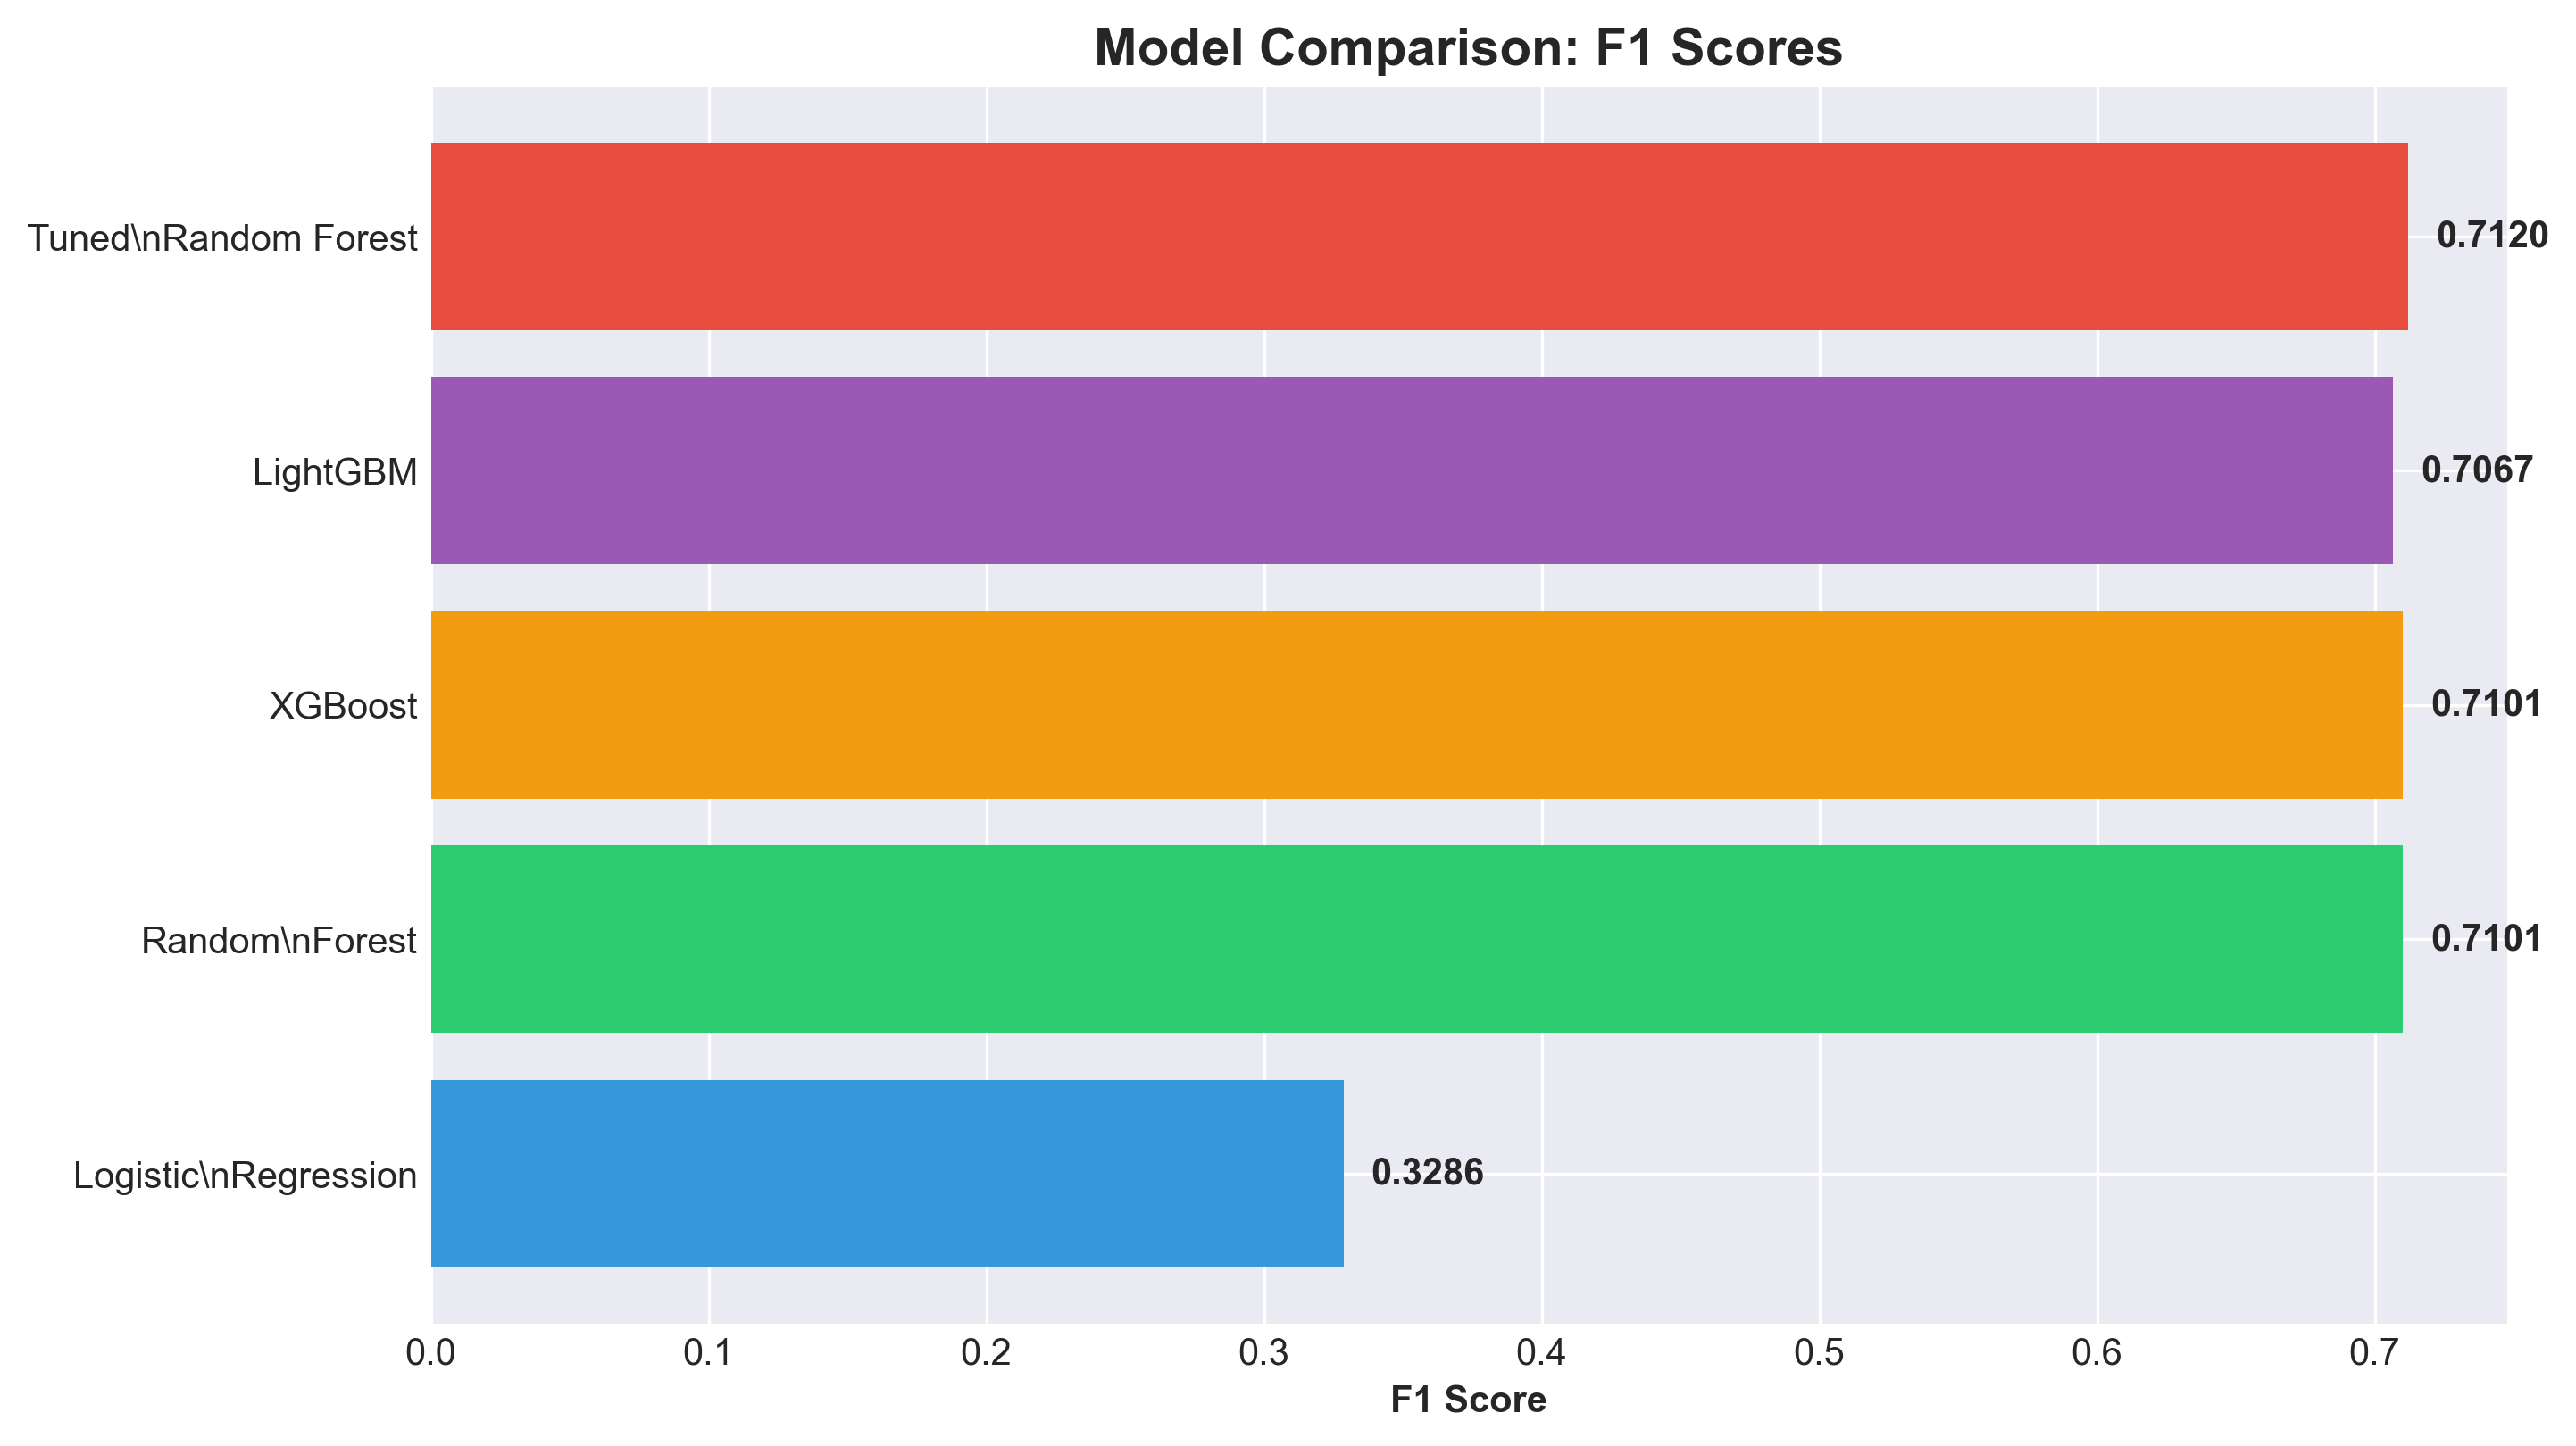

In [3]:
display(Image(filename='../report/figures/04_model_comparison_auc_pr.png'))
display(Image(filename='../report/figures/05_model_comparison_f1.png'))

### 4.2 Final Model Choice: Tuned Random Forest
We selected the **Tuned Random Forest** model. It optimizes the precision-recall trade-off through custom hyperparameter tuning, making it the most reliable tool for production deployment.

## 5. Model Interpretability (SHAP Analysis)

To ensure the model is 'explainable,' we used SHAP values to visualize how different features impact predictions.

### 5.1 Global Drivers
SHAP summary analysis confirms that **transaction velocity** (time since signup) is the single most important factor in identifying fraud.

### 5.2 Local Case Studies
We performed deep dives into specific predictions (True Positives, False Positives, and False Negatives) to understand the model's logic in real-world scenarios. This analysis helps us refine the model and understand when it might fail.

## 6. Business Recommendations

Based on our findings, we recommend the following strategic actions:

1.  **Enforce a 'Cooling Period':** Introduce a mandatory 15-minute delay for first transactions from new accounts.
2.  **Trigger Step-up Authentication:** Use SMS or 2FA for transactions identified with high-risk velocity scores.
3.  **IP Reputation Scoring:** Prioritize reviews for transactions originating from regions identified as fraud hotspots.